In [1]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt


def unitary_product_with_ket_zero(pi_time, T, delta, t_wait_T):

    omega = np.pi/(pi_time*1e-6)
    # Define the Hamiltonian H
    t_pi_over_2 = (pi_time*1e-6)/2

    
    def U1(omega,t):
        H = np.array([[0, omega  / 2],
                      [omega / 2, delta]], dtype=complex)
        U = expm(-1j * H * t)
        return U

    def U_wait(omega,t):
        H = np.array([[0, 0],
                      [0 , delta]], dtype=complex)
        U = expm(-1j * H * t)
        return U

    def U2(omega,t):
        H = np.array([[0, omega * np.exp(-1j * 2*np.pi*t_wait_T) / 2],
                      [omega * np.exp(1j * 2*np.pi*t_wait_T) / 2, delta]], dtype=complex)
        U = expm(-1j * H * t)
        return U
    # Calculate the unitaries for times t1, t2, and t3
    U1 = U1(omega,t_pi_over_2)
    U_wait = U_wait(omega,t_wait_T*T)
    U2 = U2(omega,t_pi_over_2)
    # Calculate the product of the three unitaries
    product = U2 @ U_wait @ U1
    
    # Define the ket |0⟩ vector
    ket_zero = np.array([1, 0], dtype=complex)
    
    # Multiply the product of unitaries with the ket |0⟩ vector
    result = product @ ket_zero
    state_pop = np.abs(result)**2
    return state_pop

T = 100e-6
omega = np.pi/(120e-6)
delta = 0.000e6*2*np.pi
t1 = 60e-6
t2 = 100e-6
t3 = 60e-6
pi_time = 120
t_wait_T = 1/4

product = unitary_product_with_ket_zero(pi_time, T, delta, t_wait_T)
print("Product of the three unitaries:")
print(product)

Product of the three unitaries:
[0.5 0.5]


In [3]:
t_overTs = np.linspace(0,2,100)
pops = []
for t_wait_T in t_overTs:
    product = unitary_product_with_ket_zero(pi_time, T, delta, t_wait_T)
    # print(product)
    pops.append(product)
    

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_1152\3776129502.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


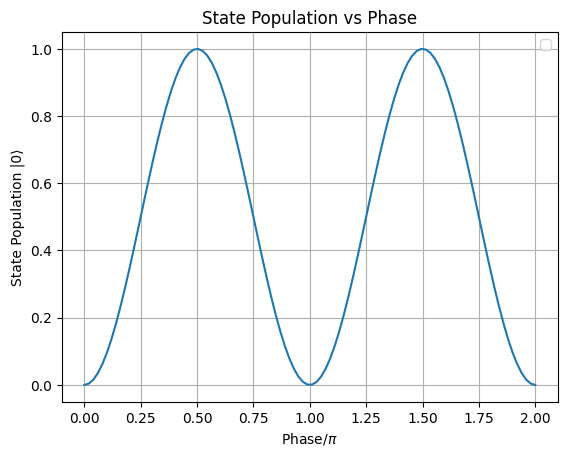

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Convert pops to a NumPy array
pops_array = np.array(pops)

plt.figure()
plt.plot(t_overTs,pops_array[:, 0])
plt.xlabel('Phase/$\pi$')
plt.ylabel('State Population |0⟩')
plt.title('State Population vs Phase')
plt.legend()
plt.grid(True)
plt.savefig('example_fast_calibration.png',dpi = 300)
plt.show()

In [3]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

def unitary_product_with_ket_zero(pi_time, T, delta, t_wait_T):
    omega = np.pi / (pi_time * 1e-6)
    t_pi_over_2 = (pi_time * 1e-6) / 2

    def U1(omega, t):
        H = np.array([[0, omega / 2],
                      [omega / 2, delta]], dtype=complex)
        U = expm(-1j * H * t)
        return U

    def U_wait(omega, t):
        H = np.array([[0, 0],
                      [0, delta]], dtype=complex)
        U = expm(-1j * H * t)
        return U

    def U2(omega, t):
        H = np.array([[0, omega * np.exp(-1j * 2 * np.pi * t_wait_T) / 2],
                      [omega * np.exp(1j * 2 * np.pi * t_wait_T) / 2, delta]], dtype=complex)
        U = expm(-1j * H * t)
        return U

    U1 = U1(omega, t_pi_over_2)
    U_wait = U_wait(omega, T)
    U2 = U2(omega, t_pi_over_2)

    product = U2 @ U_wait @ U1

    ket_zero = np.array([1, 0], dtype=complex)
    result = product @ ket_zero
    # print(np.abs(result)**2)
    state_pop = np.abs(result)**2
    state_pop_0 = state_pop[0]
    return state_pop_0

def call_unitary_product_twice(pi_time, T, delta):
    result1 = unitary_product_with_ket_zero(pi_time, T, delta, 1/4)
    result2 = unitary_product_with_ket_zero(pi_time, T, delta, 3/4)
    return result1, result2

# Example usage
pi_time = 128
T = 100e-6
delta = 100 * 2 * np.pi

result1, result2 = call_unitary_product_twice(pi_time, T, delta)

print("State population with t_wait_T = 1/4:")
print(result1)
print("State population with t_wait_T = 3/4:")
print(result2)


State population with t_wait_T = 1/4:
0.5568916511953068
State population with t_wait_T = 3/4:
0.44310836858250935


In [5]:
%matplotlib widget

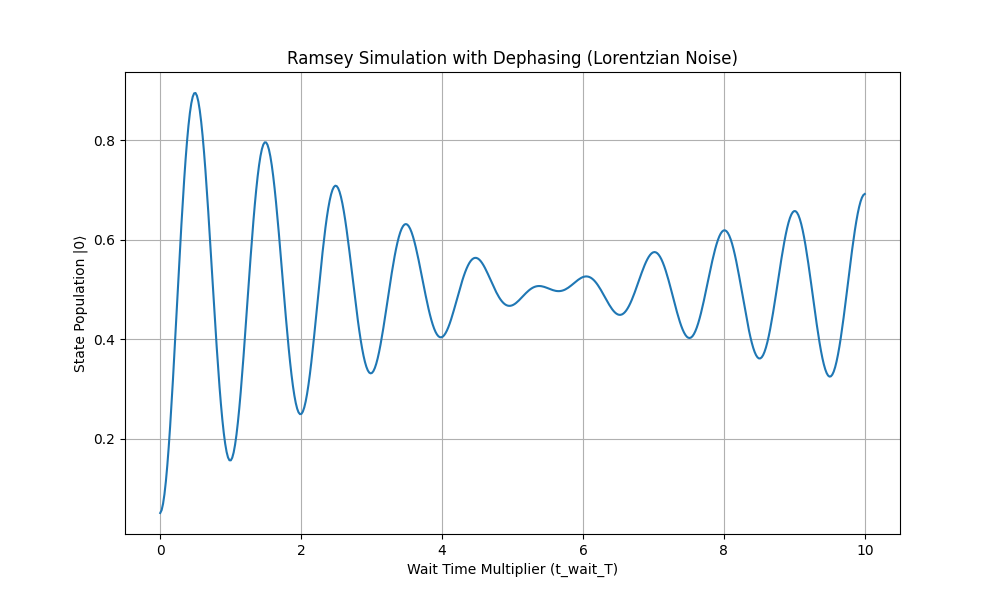

In [7]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

def unitary_product_with_ket_zero(pi_time, T, T_wait, delta, t_wait_T):
    omega = np.pi / (pi_time * 1e-6)
    t_pi_over_2 = (pi_time * 1e-6) / 2

    def U1(omega, t):
        H = np.array([[0, omega / 2],
                      [omega / 2, delta]], dtype=complex)
        U = expm(-1j * H * t)
        return U

    def U_wait(omega, t):
        H = np.array([[0, 0],
                      [0, delta]], dtype=complex)
        U = expm(-1j * H * t)
        return U

    def U2(omega, t):
        H = np.array([[0, omega * np.exp(-1j * 2 * np.pi * t_wait_T) / 2],
                      [omega * np.exp(1j * 2 * np.pi * t_wait_T) / 2, delta]], dtype=complex)
        U = expm(-1j * H * t)
        return U

    def apply_dephasing_channel(density_matrix, t, T2_star=0.8e-3):
        decay_factor = np.exp(-t / T2_star)
        p = decay_factor
        E0 = np.sqrt(p) * np.array([[1, 0],
                                    [0, 1]], dtype=complex)
        E1 = np.sqrt(1 - p) * np.array([[1, 0],
                                        [0, -1]], dtype=complex)
        new_density_matrix = E0 @ density_matrix @ E0 + E1 @ density_matrix @ E1
        return new_density_matrix

    # Initial state
    ket_zero = np.array([1, 0], dtype=complex)
    density_matrix = np.outer(ket_zero, ket_zero.conj().T)

    # Apply U1
    U1_matrix = U1(omega, t_pi_over_2)
    density_matrix = apply_dephasing_channel(density_matrix, t_pi_over_2)
    density_matrix = U1_matrix @ density_matrix @ U1_matrix.conj().T


    # Apply U_wait
    U_wait_matrix = U_wait(omega, t_wait_T * T)
    density_matrix = apply_dephasing_channel(density_matrix, t_wait_T * T)
    density_matrix = U_wait_matrix @ density_matrix @ U_wait_matrix.conj().T


    # Apply U2
    U2_matrix = U2(omega, t_pi_over_2)
    density_matrix = apply_dephasing_channel(density_matrix, t_pi_over_2)
    density_matrix = U2_matrix @ density_matrix @ U2_matrix.conj().T


    # Calculate population of |0⟩
    population_0 = ket_zero.conj().T @ density_matrix @ ket_zero
    state_pop = np.abs(population_0)

    return state_pop

# Example usage:
pi_time = 83
T = 100e-6
T_wait= 500e-6
delta = 0  # detuning

t_wait_T_values = np.linspace(0, 10, 500)
state_populations = [unitary_product_with_ket_zero(pi_time, T, T_wait, delta, t_wait_T) for t_wait_T in t_wait_T_values]

plt.figure(figsize=(10, 6))
plt.plot(t_wait_T_values, state_populations)
plt.xlabel('Wait Time Multiplier (t_wait_T)')
plt.ylabel('State Population |0⟩')
plt.title('Ramsey Simulation with Dephasing (Lorentzian Noise)')
plt.grid()
plt.show()


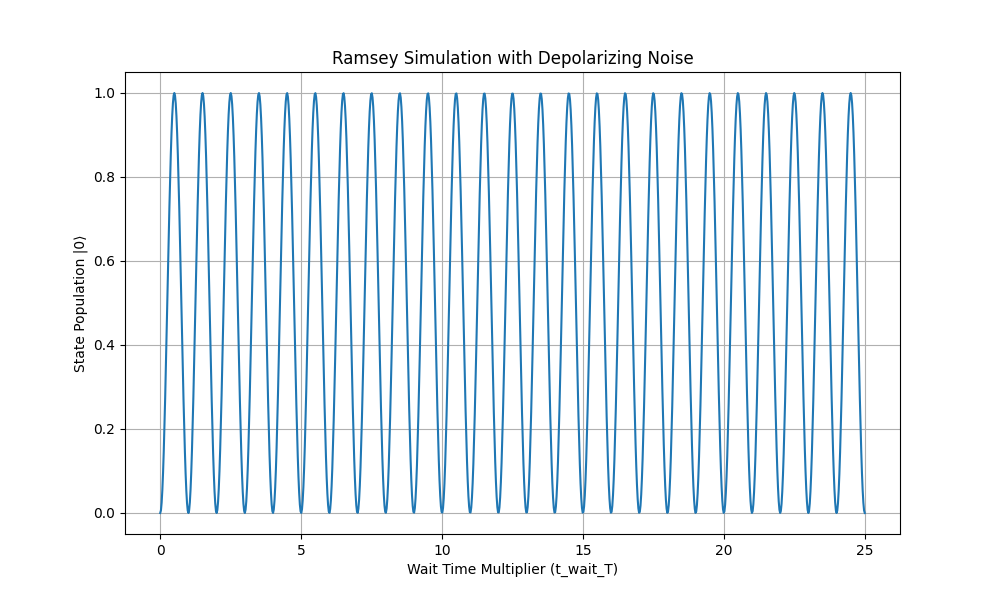

In [9]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

def unitary_product_with_ket_zero(pi_time, T, T_wait, delta, t_wait_T):
    omega = np.pi / (pi_time * 1e-6)
    t_pi_over_2 = (pi_time * 1e-6) / 2

    def U1(omega, t):
        H = np.array([[0, omega / 2],
                      [omega / 2, delta]], dtype=complex)
        U = expm(-1j * H * t)
        return U

    def U_wait(omega, t):
        H = np.array([[0, 0],
                      [0, delta]], dtype=complex)
        U = expm(-1j * H * t)
        return U

    def U2(omega, t):
        H = np.array([[0, omega * np.exp(-1j * 2 * np.pi * t_wait_T) / 2],
                      [omega * np.exp(1j * 2 * np.pi * t_wait_T) / 2, delta]], dtype=complex)
        U = expm(-1j * H * t)
        return U

    def apply_depolarizing_channel(density_matrix, t, T2_star=
                                   800e-6):
        decay_factor = np.exp(-t / (T2_star))
        p = 1-decay_factor
        I = np.eye(2, dtype=complex)
        X = np.array([[0, 1],
                      [1, 0]], dtype=complex)
        Y = np.array([[0, -1j],
                      [1j, 0]], dtype=complex)
        Z = np.array([[1, 0],
                      [0, -1]], dtype=complex)
        E0 = np.sqrt(1 - p) * I
        E1 = np.sqrt(p / 3) * X
        E2 = np.sqrt(p / 3) * Y
        E3 = np.sqrt(p / 3) * Z
        

        # new_density_matrix = (E0 @ density_matrix @ E0+
        #                       E1 @ density_matrix @ E1 +
        #                       E2 @ density_matrix @ E2+
        #                       E3 @ density_matrix @ E3)
        new_density_matrix = p*I / 2 + density_matrix*(1-p)
        return new_density_matrix

    # Initial state
    ket_zero = np.array([1, 0], dtype=complex)
    ket_one = np.array([0, 1], dtype=complex)
    density_matrix = np.outer(ket_zero, ket_zero.conj().T)

    # Apply U1
    U1_matrix = U1(omega, t_pi_over_2)
    density_matrix = U1_matrix @ density_matrix @ U1_matrix.conj().T
    # density_matrix = apply_depolarizing_channel(density_matrix, t_pi_over_2)

    # Apply U_wait
    U_wait_matrix = U_wait(omega, t_wait_T * T)
    density_matrix = U_wait_matrix @ density_matrix @ U_wait_matrix.conj().T
    # density_matrix = apply_depolarizing_channel(density_matrix, t_wait_T * T)

    # Apply U2
    U2_matrix = U2(omega, t_pi_over_2)
    density_matrix = U2_matrix @ density_matrix @ U2_matrix.conj().T
    # density_matrix = apply_depolarizing_channel(density_matrix, t_pi_over_2)

    # Calculate population of |0⟩
    population_0 = ket_zero.conj().T @ density_matrix @ ket_zero
    state_pop0 = np.abs(population_0)

    population_1 = ket_one.conj().T @ density_matrix @ ket_one
    state_pop1 = np.abs(population_1)

    return state_pop0#,state_pop1

# Example usage:
pi_time = 83
T = 100e-6
T_wait= 500e-6
delta = 0  # detuning

t_wait_T_values = np.linspace(0, 25, 1000)
state_populations = [unitary_product_with_ket_zero(pi_time, T, T_wait, delta, t_wait_T) for t_wait_T in t_wait_T_values]

plt.figure(figsize=(10, 6))
plt.plot(t_wait_T_values, state_populations)
plt.xlabel('Wait Time Multiplier (t_wait_T)')
plt.ylabel('State Population |0⟩')
plt.title('Ramsey Simulation with Depolarizing Noise')
plt.grid()
plt.show()


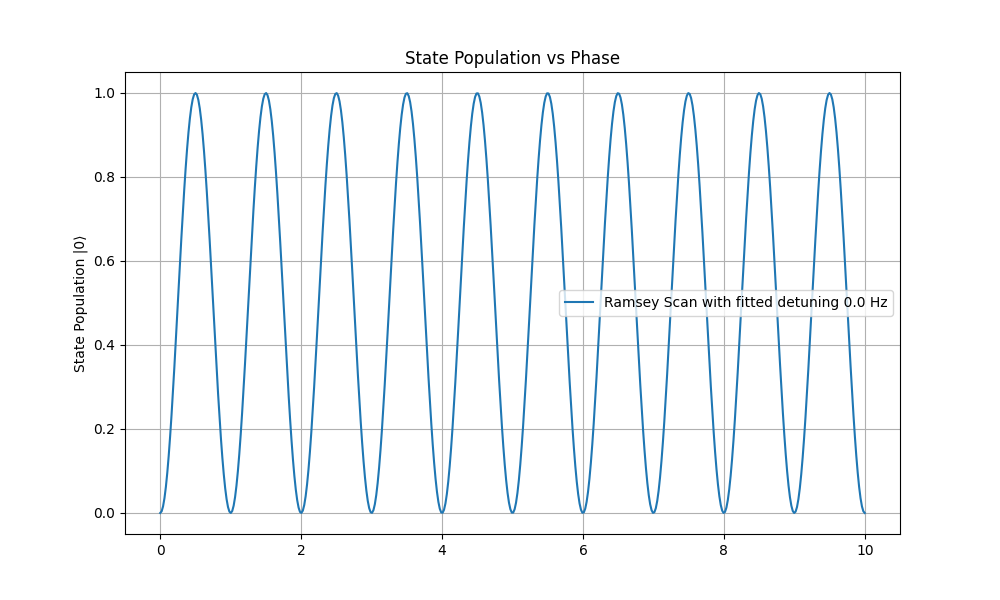

In [25]:
import numpy as np
from scipy.linalg import expm
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def unitary_product_with_ket_zero(pi_time, T,T_wait, delta, t_wait_T):
    omega = np.pi / (pi_time * 1e-6)
    t_pi_over_2 = (pi_time * 1e-6) / 2

    def U1(omega, t):
        H = np.array([[0, omega / 2],
                      [omega / 2, delta]], dtype=complex)
        U = expm(-1j * H * t)
        return U

    def U_wait(omega, t):
        H = np.array([[0, 0],
                      [0, delta]], dtype=complex)
        U = expm(-1j * H * t)
        return U

    def U2(omega, t):
        H = np.array([[0, omega * np.exp(-1j * 2 * np.pi * t_wait_T) / 2],
                      [omega * np.exp(1j * 2 * np.pi * t_wait_T) / 2, delta]], dtype=complex)
        U = expm(-1j * H * t)
        return U

    U1 = U1(omega, t_pi_over_2)
    U_wait = U_wait(omega, t_wait_T*T)
    U2 = U2(omega, t_pi_over_2)

    product = U_wait @ U1

    ket_zero = np.array([1, 0], dtype=complex)
    ket_one = np.array([0,1],dtype=complex)
    result = product @ ket_zero
    state_pop = np.abs(result)**2

    T2_star = 0.8e-3
    decay_factor = 1# np.exp(- (t_wait_T*T) / T2_star2)
    density_mat =np.outer(result,np.conjugate(result).T)
    # print(density_mat)
    p = decay_factor
    E0 = np.sqrt(p)*np.array([[1, 0],
                              [0, 1]], dtype=complex)
    E1 = np.sqrt(1-p)*np.array([[1, 0],
                              [0, -1]], dtype=complex)
    new_density_mat = E0@density_mat@E0 + E1@density_mat@E1
    evolved_density_matrix = U2 @ new_density_mat @ U2.conj().T
    population_0 = ket_zero.conj().T @ evolved_density_matrix @ ket_zero
    
    state_pop = np.abs(population_0)
    
    return state_pop

def call_unitary_product_twice(pi_time, T,T_wait, delta):
    result1 = unitary_product_with_ket_zero(pi_time, T,T_wait, delta, 1/4)
    result2 = unitary_product_with_ket_zero(pi_time, T,T_wait, delta, 3/4)
    return result1, result2

def fitting_function(delta, pi_time, T,T_wait, target_results):
    computed_result1, computed_result2 = call_unitary_product_twice(pi_time, T,T_wait, delta[0])
    target_result1, target_result2 = target_results
    error = (computed_result1 - target_result1)**2 + (computed_result2 - target_result2)**2
    return error

# Example usage
pi_time = 83
T = 100e-6
T_wait= 500e-6
initial_delta_guess = [0 * 2 * np.pi]
# result1 =  0.5982142857142857
# result2 = 0.4
target_results = (result1 , result2)  # Example target results, replace with actual target results

# result = minimize(fitting_function, initial_delta_guess, args=(pi_time, T,T_wait, target_results),method='Nelder-Mead')
# optimized_delta = result.x[0]

# print("Optimized delta value:")
# print(optimized_delta/(2*np.pi))

# Plotting the results
t_wait_T_values = np.linspace(0, 10, 500)
state_populations = [unitary_product_with_ket_zero(pi_time, T,T_wait, initial_delta_guess[0], t_wait_T) for t_wait_T in t_wait_T_values]

plt.figure(figsize=(10, 6))
plt.plot(t_wait_T_values, state_populations, label=f'Ramsey Scan with fitted detuning {np.round(optimized_delta/(2*np.pi))} Hz')

# Marking the target points
# plt.scatter([1/4, 3/4], target_results, color='red', zorder=5,marker = '.')
# plt.text(1/4, target_results[0], 'phase = ${\pi / 2}$', fontsize=10, ha='right')
# plt.text(3/4, target_results[1], 'phase = ${3\pi / 2}$', fontsize=10, ha='right')

# plt.xlabel('Phase/$2\pi$')
plt.ylabel('State Population |0⟩')
plt.title('State Population vs Phase')
plt.legend()
plt.grid(True)
plt.savefig('example_fast_calibration.png',dpi = 300)
plt.show()


Optimized delta value:
64.47375697118237


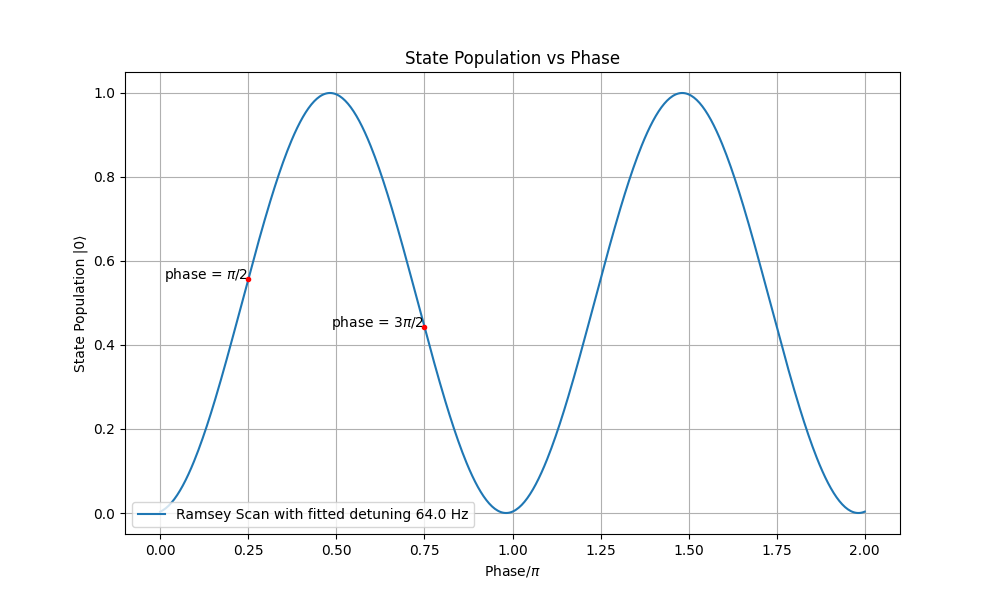

In [64]:
import numpy as np
from scipy.linalg import expm
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def unitary_product_with_ket_zero(pi_time, T, delta, t_wait_T):
    omega = np.pi / (pi_time * 1e-6)
    t_pi_over_2 = (pi_time * 1e-6) / 2

    def U1(omega, t):
        H = np.array([[0, omega / 2],
                      [omega / 2, delta]], dtype=complex)
        U = expm(-1j * H * t)
        return U

    def U_wait(omega, t):
        H = np.array([[0, 0],
                      [0, delta]], dtype=complex)
        U = expm(-1j * H * t)
        return U

    def U2(omega, t):
        H = np.array([[0, omega * np.exp(-1j * 2 * np.pi * t_wait_T) / 2],
                      [omega * np.exp(1j * 2 * np.pi * t_wait_T) / 2, delta]], dtype=complex)
        U = expm(-1j * H * t)
        return U

    U1 = U1(omega, t_pi_over_2)
    U_wait = U_wait(omega, 2*T)
    U2 = U2(omega, t_pi_over_2)

    product = U2 @ U_wait @ U1

    ket_zero = np.array([1, 0], dtype=complex)
    result = product @ ket_zero
    state_pop = np.abs(result)**2
    return state_pop

def call_unitary_product_twice(pi_time, T, delta):
    result1 = unitary_product_with_ket_zero(pi_time, T, delta, 1/4)
    result2 = unitary_product_with_ket_zero(pi_time, T, delta, 3/4)
    return result1[0], result2[0]

def fitting_function(delta, pi_time, T, target_results):
    computed_result1, computed_result2 = call_unitary_product_twice(pi_time, T, delta[0])
    target_result1, target_result2 = target_results
    error = (computed_result1 - target_result1)**2 + (computed_result2 - target_result2)**2
    return error

# Example usage
pi_time = 128
T = 100e-6
initial_delta_guess = [0000 * 2 * np.pi]
# result1 =  0.28
# result2 = 0.73
target_results = (result1 , result2)  # Example target results, replace with actual target results

result = minimize(fitting_function, initial_delta_guess, args=(pi_time, T, target_results),method='Nelder-Mead')
optimized_delta = result.x[0]

print("Optimized delta value:")
print(optimized_delta/(2*np.pi))

# Plotting the results
t_wait_T_values = np.linspace(0, 2, 500)
state_populations = [unitary_product_with_ket_zero(pi_time, T, optimized_delta, t_wait_T)[0] for t_wait_T in t_wait_T_values]

plt.figure(figsize=(10, 6))
plt.plot(t_wait_T_values, state_populations, label=f'Ramsey Scan with fitted detuning {np.round(optimized_delta/(2*np.pi))} Hz')

# Marking the target points
plt.scatter([1/4, 3/4], target_results, color='red', zorder=5,marker = '.')
plt.text(1/4, target_results[0], 'phase = ${\pi / 2}$', fontsize=10, ha='right')
plt.text(3/4, target_results[1], 'phase = ${3\pi / 2}$', fontsize=10, ha='right')

plt.xlabel('Phase/$\pi$')
plt.ylabel('State Population |0⟩')
plt.title('State Population vs Phase')
plt.legend()
plt.grid(True)
plt.savefig('example_fast_calibration.png',dpi = 300)
plt.show()


[1.1093356479670479e-31, 4.423165531906918e-05, 5.546678239835239e-31, 2.5637979419682884e-30, 7.842161424279629e-05, 4.388038785291878e-30, 7.842016002197958e-05, 4.4231775680108026e-05, 1.145080907734875e-29]
Optimized delta value using Differential Evolution:
100.00000000000007


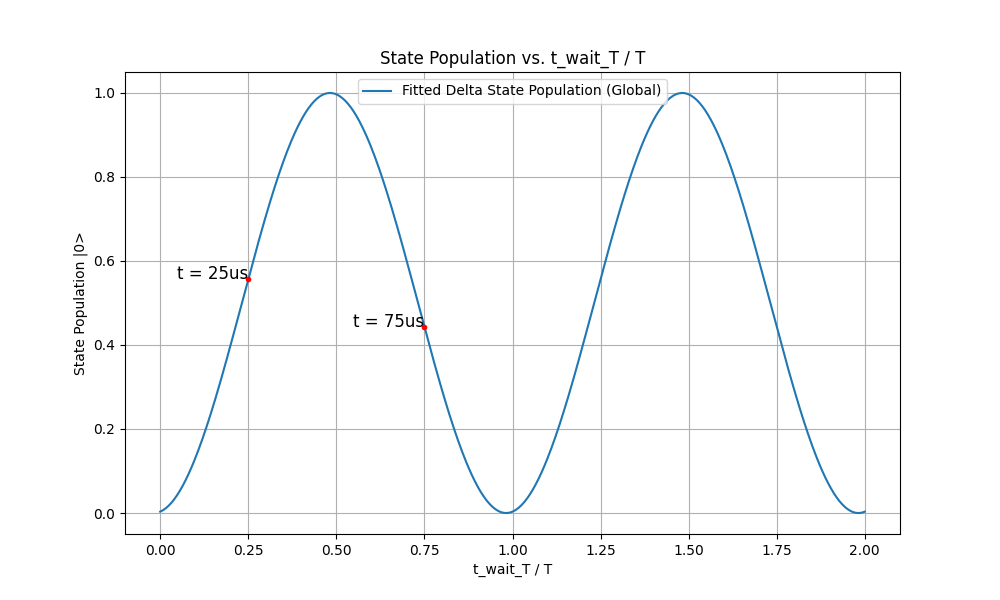

In [62]:
from scipy.optimize import differential_evolution

def optimize_delta_global(pi_time, T, target_results):
    fitted_d_list = []
    list_errors = []
    for i in range(1,10):
        initial_guess = i*1000* 2 * np.pi
        bounds = [(-initial_guess *5, initial_guess *5)]
        result = differential_evolution(fitting_function, bounds, args=(pi_time, T, target_results))
        fitted_d = result.x[0]
        error = fitting_function([fitted_d], pi_time, T, target_results)
        fitted_d_list.append(fitted_d)
        list_errors.append(error)
    min_index = list_errors.index(min(list_errors))
    best_delta = fitted_d_list[min_index]


    return best_delta, list_errors
pi_time = 128
T = 100e-6
# Example usage
initial_delta_guess = 3000* 2 * np.pi
# result1 =  0.1
# result2 = 0.0
target_results = (result1 , result2)
optimized_delta_global, best_result_global = optimize_delta_global(pi_time, T, target_results)
print(best_result_global)
print("Optimized delta value using Differential Evolution:")
print(optimized_delta_global/(2*np.pi))

# Plotting the results
t_wait_T_values = np.linspace(0, 2, 500)
state_populations = [unitary_product_with_ket_zero(pi_time, T, optimized_delta_global, t_wait_T) for t_wait_T in t_wait_T_values]

plt.figure(figsize=(10, 6))
plt.plot(t_wait_T_values, state_populations, label='Fitted Delta State Population (Global)')

# Marking the target points
plt.scatter([1/4, 3/4], target_results, color='red', zorder=5,marker = '.')
plt.text(1/4, target_results[0], 't = 25us', fontsize=12, ha='right')
plt.text(3/4, target_results[1], 't = 75us', fontsize=12, ha='right')

plt.xlabel('t_wait_T / T')
plt.ylabel('State Population |0>')
plt.title('State Population vs. t_wait_T / T')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
best_result_global

In [ ]:
#Qudit_ramsey.py created 2024-06-03 17:12:12.796107

import matlab.engine
eng = matlab.engine.start_matlab()
eng.addpath(r'C:\Users\ions\Documents\MATLAB\iqtools',nargout = 0)
eng.SendAWGCommand("RES", nargout=0)
time.sleep(1)

import sys
import time
import os
import datetime
import glob
import json
import numpy as np
import random
from scipy.optimize import curve_fit
sys.path.append(r'C:\Users\ions\Documents\IonControl\project_dir\QuditLab\config\Scripts')
from Functions_Data import *
from Functions_AWG import *
from Functions_Calibration import *
from Functions_Measurement import *
script_functions = (getGlobal, setGlobal, setScan, startScan, stopScan, getAllData, createTrace, closeTrace, plotPoint, scriptIsStopped, setEvaluation)
dt_string = datetime.datetime.now().strftime("%Y%m%d_%H%M")
year = datetime.datetime.now().strftime("%Y")
month = datetime.datetime.now().strftime("%m")
day = datetime.datetime.now().strftime("%d")
pattern = "Z:\Lab Data\Qudit_Ramsey_raw_data\Raw_data\qudit_ramsey_scan_*"


Side_band_cooling_reps = 0

real_wait_time_bool = True
#set_freq = 609.536
#probe_trans = [[0,4,1],[0,4,0],[0,3,0],[0,2,0]]
# d=3
probe_trans = [[-1,4,-3]]
#probe_trans = [[0,4,-2],[0,4,-1],[0,4,0],[0,4,1],[0,3,1],[0,3,2],[0,2,0],[0,3,0]]
detunings = [0]

s12_level = probe_trans[0][0]

#detuning = 0.005
periodicity = 200 #us

stop_time = 1000
start_time = 0
time_step = 20

f_offset = 545.432016
f_upper = 623.22966

pitime_n2 = 25.643 # [-2, 4, -4]
pitime_n1 = 48.479 # [-2, 3, -3]
pitime_0 = 52.369 # [2, 4, 2]
pitime_p1 = 38.342 # [2, 4, 3]
pitime_p2 = 48.063 # [2, 4, 4]
ref_pitimes = [pitime_n2,pitime_n1,pitime_0,pitime_p1,pitime_p2]


F1PumpTime = 0.5 #us
F1PumpReps = 50
InitReps = 0
fs = 4e9
threshold = 10

list_of_inits = [[[-1,3,-2],[0,4,-2],[1,4,0],[2,4,2]],
[[-2,3,-1],[0,3,0],[1,4,0],[2,4,3]],
[[-2,2,-1],[-1,3,0],[1,3,2],[2,4,2]],
[[-2,3,-1],[-1,3,0],[0,3,2],[2,4,3]],
[[-2,2,-1],[-1,3,0],[0,3,2],[1,3,3]]
]

init_trans = list_of_inits[s12_level+2]
init_freqs_array = list(Get_1762_EOM_Freqs(init_trans,f_offset,f_upper))
init_times_array = list(Get_1762_PiTimes(init_trans,pitime_n2,pitime_n1,pitime_0,pitime_p1,pitime_p2))
init_pulse_time = sum(init_times_array) 

set_freq = list(Get_1762_EOM_Freqs(probe_trans,f_offset,f_upper))
#set_freq = [545.429083,594.7936,622.70014]
print('set freq', set_freq)


for idx, delta in enumerate(detunings):
    set_freq[idx] = set_freq[idx] + delta

pi_times= list(Get_1762_PiTimes(probe_trans,pitime_n2,pitime_n1,pitime_0,pitime_p1,pitime_p2))
times = []
for i in range(len(pi_times)):
    times.append(2*pi_times[i]*np.arcsin(np.sqrt(1/(len(pi_times)+1-i)))/np.pi)


print(times)
full_freqs = set_freq + [0] + list(np.flip(set_freq))
print(full_freqs)

#set_freq = [482.5060]

#Probe_times = list(Get_1762_PiTimes(probe_trans,pitime_n2,pitime_n1,pitime_0,pitime_p1,pitime_p2))

F1_Pump_Time = getGlobal('F1_PumpTime')
if not "%s"%F1_Pump_Time == "%s us"%F1PumpTime:
    setGlobal("F1_PumpTime", F1PumpTime, "us")

Init_reps = getGlobal('InitialisationReps')
if not "%s"%Init_reps == InitReps:
    setGlobal("InitialisationReps", InitReps, "")

F1Pump_reps = getGlobal('F1_PumpReps')
if not "%s"%F1Pump_reps == F1PumpReps:
    setGlobal("F1_PumpReps", F1PumpReps, "")

Init_PulseTime = getGlobal('Init_Shelving_Pulse_Time')
if not "%s"%Init_PulseTime == init_pulse_time:
    setGlobal("Init_Shelving_Pulse_Time", init_pulse_time, "us")

SB_cooling_reps = getGlobal("Sideband_Cooling_Reps")
if not "%s"%SB_cooling_reps == Side_band_cooling_reps:
    setGlobal("Sideband_Cooling_Reps", Side_band_cooling_reps, "")

os.system('ssh pi@192.168.168.103 python ~/pll-evalboard-synthesizer/src/Control-Programs/att1.py 16 %s'%10)
os.system('ssh pi@192.168.168.103 python ~/pll-evalboard-synthesizer/src/Control-Programs/att1.py 13 %s'%0)

pulse_program = "Qudit_ramsey_experiment"


        
def findPiTime_withfit_plotPD(f_offset,f_upper,stop_time,start_time, time_step, threshold, pulse_program, script_functions):
    getGlobal, setGlobal, setScan, startScan, stopScan, getAllData, createTrace, closeTrace, plotPoint, scriptIsStopped, setEvaluation = script_functions
    createTrace('Qudit Ramsey, 0 state', 'Scan Data', xLabel=f'Pulse Time (us)')
    pulse_time = start_time
    fluor_ave = []
    pulse_time_list = []
    file_names_list = []
    while np.round(pulse_time) < stop_time:
        if scriptIsStopped():
            break

        # take calibrations every so often
        if np.round(pulse_time)%200==0 or pulse_time==start_time:
            freq_list, pitime_list = run_calibration(script_functions,do_pi_time_calibration=False,low_power=False,f_offset_input=f_offset,f_upper_input=f_upper,ref_pitimes=ref_pitimes)
            f_offset = freq_list[0]
            f_upper = freq_list[1]
            print('newly calibrated offset and upper freqs', f_offset, f_upper)
            setEvaluation('Eval3')
        else:
            pass

        init_trans = list_of_inits[s12_level+2]
        init_freqs_array = list(Get_1762_EOM_Freqs(init_trans,f_offset,f_upper))
        init_times_array = list(Get_1762_PiTimes(init_trans,pitime_n2,pitime_n1,pitime_0,pitime_p1,pitime_p2))
        init_pulse_time = sum(init_times_array) 

        set_freq = list(Get_1762_EOM_Freqs(probe_trans,f_offset,f_upper))
        #set_freq = [545.429083,594.7936,622.70014]
        print('set freq', set_freq)


        for idx, delta in enumerate(detunings):
            set_freq[idx] = set_freq[idx] + delta

        pi_times= list(Get_1762_PiTimes(probe_trans,pitime_n2,pitime_n1,pitime_0,pitime_p1,pitime_p2))
        times = []
        for i in range(len(pi_times)):
            times.append(2*pi_times[i]*np.arcsin(np.sqrt(1/(len(pi_times)+1-i)))/np.pi)


        print(times)
        full_freqs = set_freq + [0] + list(np.flip(set_freq))
        print(full_freqs)


        print('1')

#Pulse Times ==============================================================
        if real_wait_time_bool:
            full_times = list(times) + [pulse_time] + list(np.flip(times))
        else:
            full_times = list(times) + [0] + list(np.flip(times))
#==============================================================
        Ramsey_wait_time_dummy = getGlobal('Ramsey_Wait_Time')
        if not "%s"%Ramsey_wait_time_dummy == "%s us"%sum(full_times):
            setGlobal("Ramsey_Wait_Time", sum(full_times), "us")

        half_pi_time_dummy = getGlobal('Shelving_Pulse_Time')
        if not "%s"%half_pi_time_dummy == "%s us"%sum(full_times):
            setGlobal("Shelving_Pulse_Time", sum(full_times), "us")
        print('2')
# Phase Calculations ===================================================================
        zero_phase = []
        phases = []
        for i in range(len(pi_times)):
            zero_phase.append(0)
            print("num_state:",i)
            #pulse_time = 1
            phases.append((2 * np.pi * pulse_time * (i+1) / periodicity) + np.pi)
        full_phases = zero_phase + [0] + list(np.flip(phases))
        print(full_phases)
#=======================================================================================
# AWG commands======================================================================================
        eng.SendAWGCommand("RES", nargout=0)
        time.sleep(5)
        eng.SendAWGCommand("TRAC:DEL:ALL",nargout = 0)
        eng.SendAWGCommand("SOUR:SEQ:DEL:ALL",nargout = 0)
        eng.SendAWGCommand("INIT:CONT 0", nargout=0) #0 sets AWG to externally triggered mode
        eng.SendAWGCommand("OUTP:STAT 1", nargout=0)
        eng.SendAWGCommand("SOUR:FUNC:MODE USER",nargout = 0)

        eng.SendAWGCommand("ROSC:SOUR EXT", nargout=0)
        time.sleep(0.1)
        eng.SendAWGCommand("ROSC:SOUR INT", nargout=0)

        eng.SendAWGCommand("TRAC:DEL:ALL",nargout = 0)
        eng.SendAWGCommand("SOUR:SEQ:DEL:ALL",nargout = 0)

        print('3')
#----------------------------------------------------------------------------
        matlab_init_freqs = matlab.double(init_freqs_array)
        matlab_init_times = matlab.double(init_times_array)
#----------------------------------------------------------------------------
        print(full_freqs)
        print(full_times)
        matlab_set_freq = matlab.double(full_freqs)
        matlab_probe_pulse_time = matlab.double(full_times)
        matlab_probe_phases = matlab.double(full_phases)
#----------------------------------------------------------------------------
        power_factor = matlab.double([1])
        power_factor_dbm = matlab.double([1])
        print('4.5')
        seg_num = 1
        eng.Pulse_upload(matlab_init_freqs,matlab_init_times,fs,seg_num,power_factor,nargout = 0)
        if scriptIsStopped():
            break
        seg_num = seg_num + 1
        print('5')
        eng.Pulse_upload_dummy(fs,seg_num,nargout = 0) # Dummy 3rd sequence
        seg_num = seg_num + 1
        eng.Pulse_upload_with_phases(matlab_set_freq,matlab_probe_pulse_time,matlab_probe_phases,fs,seg_num,nargout = 0)
        if scriptIsStopped():
            break
        seg_num = seg_num + 1
        eng.Pulse_upload_dummy(fs,seg_num,nargout = 0) # Dummy 3rd sequence
        print('6')
        # Readout pulses
        for idx, freq in enumerate(set_freq):

            matlab_ro_freq = matlab.double([freq])
            matlab_ro_time = matlab.double([pi_times[idx]])
            print(seg_num,[freq],[pi_times[idx]])
            seg_num = seg_num + 1
            eng.Pulse_upload(matlab_ro_freq,matlab_ro_time,fs,seg_num,power_factor,nargout = 0)
            if scriptIsStopped():
                break
            seg_num = seg_num + 1
            eng.Pulse_upload_dummy(fs,seg_num,nargout = 0) # Dummy 3rd sequence

#-------------------------------------------------------------------------------------------------------------------------
        print('7')

        eng.SendAWGCommand("SOUR:SEQ:DEF 1,1,1,1", nargout=0)
        eng.SendAWGCommand("SOUR:SEQ:DEF 2,2,1,1", nargout=0)
        eng.SendAWGCommand("SOUR:SEQ:DEF 3,3,1,0", nargout=0)
        eng.SendAWGCommand("SOUR:SEQ:DEF 4,4,1,1", nargout=0)
        seq_num = 4

        for idx, freq in enumerate(set_freq):
            seq_num = seq_num + 1
            string = f"SOUR:SEQ:DEF {seq_num}, {seq_num},1,0"
            eng.SendAWGCommand(string, nargout=0)
            seq_num = seq_num + 1
            string = f"SOUR:SEQ:DEF {seq_num}, {seq_num},1,1"
            eng.SendAWGCommand(string, nargout=0)

        Table_length_dummy =  getGlobal('Table_length')
        if not "%s"%Table_length_dummy == seq_num:
            setGlobal("Table_length", seq_num, "")

        eng.SendAWGCommand("SOUR:FUNC:MODE SEQ",nargout = 0)

        eng.SendAWGCommand("OUTP:COUP DC",nargout = 0)

        eng.SendAWGCommand("SOUR:VOLT:LEV:AMPL 1.5",nargout = 0)


        #total_time = sum([piover2_time,pulse_time,piover2_time])+30
        #PulseTime_Dummy = getGlobal('Shelving_Pulse_Time').magnitude
        #if not "%s"%PulseTime_Dummy == "%s us"%total_time:
        #    setGlobal("Shelving_Pulse_Time", total_time, "us")
        #time.sleep(0.2)

        setScan(pulse_program)
        startScan(globalOverrides=list(), wait=True)
        stopScan()

        matching_files = glob.glob(pattern)
        matching_files = sorted(matching_files, key=lambda t: os.stat(t).st_mtime)
        file_path = matching_files[-1]
        chunks = file_path.split('\\')
        #print(chunks[-1])        
        fname = chunks[-1]
        file_names_list.append(fname)
        print("=========================================")

        arrays = []
        with open(file_path, 'r') as file:
            print(file_path)
            for line in file:
                data = json.loads(line)
                arrays.append(data[0]["0"][0])
        mean_value = np.mean(np.array(arrays)<threshold)
        print("=========================================")

        if np.isnan(mean_value):
            mean_value = 1
        PD = mean_value
        print("PD is", PD)
        fluor_ave.append(PD)
        pulse_time_list.append(pulse_time)

        plotPoint(pulse_time, PD,'Qudit Ramsey, 0 state', plotStyle=2)

        pulse_time = pulse_time + time_step
        
    closeTrace('Qudit Ramsey, 0 state')
    freq_string = str(round(set_freq[0],3)).replace('.','p')
    combined_data = zip(pulse_time_list,fluor_ave)
    filename = f'Z:\\Lab Data\\Qudit_Ramsey_raw_data\\Raw_data_PD\\\Ramsey_experiment_Dimension_{len(set_freq)+1}_{dt_string}.txt'
    with open(filename,'w') as file:
        for x,y in combined_data:
            file.write(f"{x},{y}\n")
        file.write(f"{set_freq}\n")
        file.write(f"{pi_times},[{pitime_n2},{pitime_n1},{pitime_0},{pitime_p1},{pitime_p2}]\n")
        file.write(f"{phases}\n")
        file.write(f"{file_names_list}\n")

setEvaluation('Eval3')

pi_time = findPiTime_withfit_plotPD(f_offset,f_upper,stop_time,start_time, time_step, threshold, pulse_program, script_functions)
print(pi_time)
setEvaluation('Eval2')
#with open(output_file_pitimes,'a') as outfile:
#    outfile.write(f'{pi_time}\n')

eng.quit()

In [ ]:
#Functions_Calibration.py created 2024-07-24 10:23:36.942221

import sys
sys.path.append(r'C:\Users\ions\Documents\IonControl\project_dir\QuditLab\config\Scripts')

from Functions_Data import *
from Functions_AWG import *
from Functions_Measurement import *
script_functions = (getGlobal, setGlobal, setScan, startScan, stopScan, getAllData, createTrace, closeTrace, plotPoint, scriptIsStopped, setEvaluation)

def run_calibration(script_functions,do_pi_time_calibration=False,low_power=False,f_offset_input=None,f_upper_input=None,ref_pitimes=None):
    getGlobal, setGlobal, setScan, startScan, stopScan, getAllData, createTrace, closeTrace, plotPoint, scriptIsStopped, setEvaluation = script_functions

    import time
    import matlab.engine
    eng = matlab.engine.start_matlab()
    eng.addpath(r'C:\Users\ions\Documents\MATLAB\iqtools',nargout = 0)
    eng.SendAWGCommand("RES", nargout=0)
    time.sleep(1)

    import os
    import datetime
    import glob
    import numpy as np
    import random
        
    from scipy.optimize import curve_fit
    
    


    line_trigger = True
    pulse_program = "Shelving_InitScheme_Comparison_AWGOnly_Ba137"

    threshold = 8
    F1PumpTime = 0.5 #us
    F1PumpReps = 20
    InitReps = 0
    fs = 4e9
    Side_band_cooling_reps = 0
    low_power_factor = 1500

    SB_cooling_reps = getGlobal("Sideband_Cooling_Reps")
    if not "%s"%SB_cooling_reps == Side_band_cooling_reps:
        setGlobal("Sideband_Cooling_Reps", Side_band_cooling_reps, "")

    f_offset_index = [0,2,0]
    f_upper_index = [-1,4,-3]
    pitime_ref_index = [[-2,4,-4],[-2,3,-3],[2,4,2],[2,4,3],[2,4,4]]

    if f_offset_input and f_upper_input:
        [f_offset,f_upper] = [f_offset_input,f_upper_input]
    else:
        [f_offset,f_upper] = Get_1762_Latest_EOM_Freqs([f_offset_index,f_upper_index])

    if ref_pitimes:
        [pitime_n2,pitime_n1,pitime_0,pitime_p1,pitime_p2] = ref_pitimes
    else:
        [pitime_n2,pitime_n1,pitime_0,pitime_p1,pitime_p2] = Get_1762_Latest_PiTimes(pitime_ref_index)

    print('offset and upper freqs', f_offset,f_upper)
    print('pitimes',[pitime_n2,pitime_n1,pitime_0,pitime_p1,pitime_p2])

    init_n2_index = [[-1,3,-2],[0,3,0],[1,4,0],[2,4,3]]
    init_n1_index = [[-2,3,-1],[0,3,0],[1,4,2],[2,4,3]]
    init_0_index = [[-2,2,-1],[-1,3,0],[1,3,2],[2,4,2]]
    init_p1_index = [[-2,3,-1],[-1,3,0],[0,3,2],[2,4,3]]
    init_p2_index = [[-2,3,-1],[-1,3,0],[0,3,2],[1,3,3]]

    dt_string = datetime.datetime.now().strftime("%Y%m%d_%H%M")
    year = datetime.datetime.now().strftime("%Y")
    month = datetime.datetime.now().strftime("%m")
    day = datetime.datetime.now().strftime("%d")

    init_freqs_n2 = list(Get_1762_EOM_Freqs(init_n2_index,f_offset,f_upper))
    init_freqs_n1 = list(Get_1762_EOM_Freqs(init_n1_index,f_offset,f_upper))
    init_freqs_0 = list(Get_1762_EOM_Freqs(init_0_index,f_offset,f_upper))
    init_freqs_p1 = list(Get_1762_EOM_Freqs(init_p1_index,f_offset,f_upper))
    init_freqs_p2 = list(Get_1762_EOM_Freqs(init_p2_index,f_offset,f_upper))

    init_times_n2 = list(Get_1762_PiTimes(init_n2_index,pitime_n2,pitime_n1,pitime_0,pitime_p1,pitime_p2))
    init_times_n1 = list(Get_1762_PiTimes(init_n1_index,pitime_n2,pitime_n1,pitime_0,pitime_p1,pitime_p2))
    init_times_0 = list(Get_1762_PiTimes(init_0_index,pitime_n2,pitime_n1,pitime_0,pitime_p1,pitime_p2))
    init_times_p1 = list(Get_1762_PiTimes(init_p1_index,pitime_n2,pitime_n1,pitime_0,pitime_p1,pitime_p2))
    init_times_p2 = list(Get_1762_PiTimes(init_p2_index,pitime_n2,pitime_n1,pitime_0,pitime_p1,pitime_p2))

    init_freqs_array = [init_freqs_n2,init_freqs_n1,init_freqs_0,init_freqs_p1,init_freqs_p2]
    init_times_array = [init_times_n2,init_times_n1,init_times_0,init_times_p1,init_times_p2]

    output_file_freqs = fr'Z:\Lab Data\D52_Calibration_Ba137\New_initialized_calibration_freq_files\New_initialized_calibration_freq_files_{dt_string}.txt'

    if do_pi_time_calibration:
        full_scan_indices =  [[f_offset_index] + [f_upper_index] + pitime_ref_index]
    elif not do_pi_time_calibration:
        full_scan_indices =  [[f_offset_index]+[f_upper_index]]


    LT_dummy = getGlobal('LineTriggerBoolean')
    if not "%s"%LT_dummy == int(line_trigger):
        setGlobal("LineTriggerBoolean", int(line_trigger), "")

    F1_pumpTime = getGlobal('F1_PumpTime')
    if not "%s"%F1_pumpTime == "%s us"%F1PumpTime:
        setGlobal("F1_PumpTime", F1PumpTime, "us")

    OptPumpTime = getGlobal('OpticalPumpTimeGlobal')
    if not "%s"%OptPumpTime == "%s us"%0:
        setGlobal("OpticalPumpTimeGlobal", 0, "us")

    F1_Pump_Time = getGlobal('F1_PumpTime')
    if not "%s"%F1_Pump_Time == "%s us"%F1PumpTime:
        setGlobal("F1_PumpTime", F1PumpTime, "us")

    Init_reps = getGlobal('InitialisationReps')
    if not "%s"%Init_reps == InitReps:
        setGlobal("InitialisationReps", InitReps, "")

    F1Pump_reps = getGlobal('F1_PumpReps')
    if not "%s"%F1Pump_reps == F1PumpReps:
        setGlobal("F1_PumpReps", F1PumpReps, "")

    SB_cooling_reps = getGlobal("Sideband_Cooling_Reps")
    if not "%s"%SB_cooling_reps == 0:
        setGlobal("Sideband_Cooling_Reps", 0, "")

    freq_list_fitted = []
    pitime_list_fitted = []

    def findResonance_withfit_plotPD(init_state, pi_pulse_time, start_freq, stop_freq, freq_step, dt_string , threshold, pulse_program, script_functions):
        getGlobal, setGlobal, setScan, startScan, stopScan, getAllData, createTrace, closeTrace, plotPoint, scriptIsStopped, setEvaluation = script_functions
        set_freq = start_freq
        createTrace('1762 nm freq scan', 'Script Data', xLabel=f'Freq (MHz)')
        flour_exp = []
        fluor_ave = []
        freq_list = []

        dummy_counter = 0
        eng.SendAWGCommand("RES", nargout=0)
        time.sleep(1)
        eng.SendAWGCommand("TRAC:DEL:ALL",nargout = 0)
        eng.SendAWGCommand("SOUR:SEQ:DEL:ALL",nargout = 0)
        eng.SendAWGCommand("INIT:CONT 0", nargout=0)
        eng.SendAWGCommand("OUTP:STAT 1", nargout=0)
        eng.SendAWGCommand("ROSC:SOUR EXT", nargout=0)
        time.sleep(0.1)
        eng.SendAWGCommand("ROSC:SOUR INT", nargout=0)
        print(set_freq,pi_pulse_time)

        print(init_freqs_array[int(init_state+2)],init_times_array[int(init_state+2)])
        matlab_init_freqs = matlab.double(init_freqs_array[int(init_state+2)])
        matlab_init_times = matlab.double(init_times_array[int(init_state+2)])
        power_factor = matlab.double([1])

        if low_power:
            matlab_probe_pulse_time = matlab.double([0.6*low_power_factor])
            power_factor_dbm = matlab.double([pi_pulse_time/low_power_factor])
        else:
            matlab_probe_pulse_time = matlab.double([pi_pulse_time])
            power_factor_dbm = matlab.double([1])

        eng.Pulse_upload(matlab_init_freqs,matlab_init_times,fs,1,power_factor,nargout = 0)
        eng.Pulse_upload_dummy(fs,3,nargout = 0) # Dummy 3rd sequence

        while set_freq <= stop_freq:
            if scriptIsStopped():
                eng.quit()
                break
            #if dummy_counter >0:
                #eng.SendAWGCommand("SOUR:SEQ:DEL:2",nargout = 0)
            #eng.SendAWGCommand("TRAC:DEL 2",nargout = 0)        
            matlab_set_freq = matlab.double([set_freq])
            eng.Pulse_upload(matlab_set_freq,matlab_probe_pulse_time,fs,2,power_factor_dbm,nargout = 0)

            eng.SendAWGCommand("SOUR:FUNC:MODE USER",nargout = 0)
            eng.SendAWGCommand("SOUR:SEQ:DEL:ALL",nargout = 0)
            time.sleep(0.5)

            eng.SendAWGCommand("SOUR:SEQ:DEF 1,1,1,1", nargout=0)
            eng.SendAWGCommand("SOUR:SEQ:DEF 2,3,1,1", nargout=0)
            eng.SendAWGCommand("SOUR:SEQ:DEF 3,2,1,0", nargout=0)
            eng.SendAWGCommand("SOUR:SEQ:DEF 4,3,1,1", nargout=0)

            eng.SendAWGCommand("SOUR:FUNC:MODE SEQ",nargout = 0)

            eng.SendAWGCommand("OUTP:COUP DC",nargout = 0)

            eng.SendAWGCommand("SOUR:VOLT:LEV:AMPL 1.5",nargout = 0)
            dummy_counter = dummy_counter + 1
            if scriptIsStopped():
                eng.quit()
                break

            setScan(pulse_program)
            startScan(globalOverrides=list(), wait=True)
            stopScan()
            data = getAllData()['PMT Count']
            ydata = data[1]
            #threshold = getShelvingThreshold2(ydata)
            fluor_bool = np.array(ydata) < threshold
            
            #def upload_error(pd_last,pd_current):
            #    if abs(pd_last-pd_current)>0.8:
            #        return True
            #    else:
            #        return False
            
            # check for decrystalisation
            #def DC_check(data):
            #    count = 0
            #    for value in data:
            #        if value:
            #            count += 1
            #            if count >= 100:
            #                return True
            #        else:
            #            count = 0
            #    return False

            PD = np.mean(fluor_bool)
            flour_exp.append(ydata)

            fluor_ave.append(PD)
            freq_list.append(set_freq)
            plotPoint(set_freq, PD, '1762 nm freq scan', plotStyle=0)
            set_freq = np.round(set_freq + freq_step, 4)


        closeTrace('1762 nm freq scan')

        def sin_squared(f, f0, A, Omega, t):
                delta = f - f0
                return A * (Omega**2 /
                            (Omega**2 + delta**2)) * (np.sin(
                                np.sqrt(Omega**2 +
                                        delta**2) * t / 2))**2

        # best way to find centre freq when pi-time is uncertain
        f0_guess = np.sum(np.multiply(freq_list, fluor_ave)) / np.sum(fluor_ave)
        # need to check if this will be a good f0_guess
        # it won't be if we are too frequency uncertain
        f_range = freq_list[-1] - freq_list[0]
        top_30_percent = freq_list[-1] - f_range / 3
        bot_30_percent = freq_list[0] + f_range / 3
        if f0_guess > top_30_percent or f0_guess < bot_30_percent:
            f0_guess = freq_list[np.argmax(fluor_ave)]

        # Omega_guess = 0.1 * ((freq_list[-1] - freq_list[0]))  # in MHz
        f_variance = (freq_list - f0_guess)**2
        Omega_guess = np.sqrt(
            np.sum(np.multiply(f_variance, fluor_ave)) / np.sum(fluor_ave) / 4)

        A_guess = max(fluor_ave)
        t_guess = np.pi / Omega_guess
        p0 = np.array([f0_guess, A_guess, Omega_guess, t_guess])
        
        # Fit the data to the Rabi fringe function with initial guesses
        popt, pcov = curve_fit(sin_squared,freq_list,fluor_ave,p0=p0,maxfev=10000)

        # check that the fit succeeded - if not change pulse time guess
        pulse_time_mult_factor = 1.0
        while pcov[3][3] > 10000:
            pulse_time_mult_factor = pulse_time_mult_factor + 0.5
            p0 = np.array([
                f0_guess, A_guess, Omega_guess,
                (pulse_time_mult_factor + 1) * t_guess
            ])

            popt, pcov = curve_fit(sin_squared,freq_list,fluor_ave,p0=p0,maxfev=10000)

        freq_res = popt[0]
        uncertainty = np.sqrt(pcov[0][0])
        print(f'freqs covered: {freq_list}')
        print(f'fluor ave: {fluor_ave}')
        print(f'{freq_res}, amp={popt[2]}, width={popt[1]}, bg={popt[3]}')
        #Sving Raw data for the plots
        freq_string = str(round(freq_res,4)).replace('.','p')
        combined_data = zip(freq_list,fluor_ave)
        filename = f'Z:\Lab Data\D52_Calibration_Ba137\\New_initialized_calibration_freq_raw_data\\New_D52_calibration_raw_data_freq_{freq_string}_{dt_string}.txt'
        with open(filename,'w') as file:
            for x,y in combined_data:
                file.write(f"{x},{y}\n")
            file.write(f"{uncertainty}")
        #Saving Raw data of each Experiment
        combined_data = zip(freq_list,flour_exp)
        filename = f'Z:\Lab Data\D52_Calibration_Ba137\\New_initialized_calibration_freq_each_exp_raw_data\\New_D52_calibration_each_exp_raw_data_freq_{freq_string}_{dt_string}.txt'
        with open(filename,'w') as file:
            for x,y in combined_data:
                file.write(f"{x},{y}\n")
            file.write(f"{uncertainty}")
        return freq_res

    def findPiTime_withfit_plotPD(freq_peak, stop_time, time_step, threshold, pulse_program, script_functions):
        getGlobal, setGlobal, setScan, startScan, stopScan, getAllData, createTrace, closeTrace, plotPoint, scriptIsStopped, setEvaluation = script_functions
        createTrace('1762 nm pi-time scan', 'Scan Data', xLabel=f'Pulse Time (us)')
        pulse_time = 0
        fluor_ave = []
        pulse_time_list = []
        flour_exp = []
        while pulse_time <= stop_time:
            if scriptIsStopped():
                break
            PulseTime_Dummy = getGlobal('Shelving_Pulse_Time').magnitude
            if not "%s"%PulseTime_Dummy == "%s us"%pulse_time:
                setGlobal("Shelving_Pulse_Time", pulse_time, "us")
            time.sleep(1)

            setScan(pulse_program)
            startScan(globalOverrides=list(), wait=True)
            stopScan()
            data = getAllData()['PMT Count']
            ydata = data[1]
            fluor_bool = np.array(ydata) < threshold
            PD = np.mean(fluor_bool)
            flour_exp.append(fluor_bool)

            fluor_ave.append(PD)
            pulse_time_list.append(pulse_time)

            plotPoint(pulse_time, PD, '1762 nm pi-time scan', plotStyle=0)

            pulse_time = pulse_time + time_step
            
        closeTrace('1762 nm pi-time scan')

        def oscfunc(t, A, w, p, c, d):
            return A * np.cos(w * t + p) * np.exp(-t / d) + c

        def fit_oscillation(tt, yy):
            '''Fit sin to the input time sequence, and return fitting parameters:
            "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc".

            Option to take on guesses and bounds for the fit too.'''
            tt = np.array(tt)
            yy = np.array(yy)
            ff = np.fft.fftfreq(len(tt), (tt[1]-tt[0]))
            Fyy = abs(np.fft.fft(yy))
            guess_freq = abs(ff[np.argmax(Fyy[1:])+1])
                
            guess_amp = np.max(yy)-np.mean(yy)
            guess_offset = np.mean(yy)

            guess = np.array([guess_amp, 2.*np.pi*guess_freq, np.pi, guess_offset, 1e4])
            popt, pcov = curve_fit(oscfunc, tt, yy, p0=guess, maxfev=10000)
            uncertainty = np.sqrt(pcov[1][1])
            A, omeg, p, c, d = popt
            f = omeg/(2.*np.pi)
            
            return omeg, uncertainty

        
        omega, uncertainty = fit_oscillation(pulse_time_list,fluor_ave)
        print("firstpass_omega is", omega)

        period = 2*np.pi/omega
        pulse_time_list = np.array(pulse_time_list)
        fluor_ave = np.array(fluor_ave)
        #pulse_time_list_new = pulse_time_list[pulse_time_list <= int(period)]
        #fluor_ave_new = fluor_ave[:len(pulse_time_list_new)]
        #pulse_time_list_new = pulse_time_list
        #fluor_ave_new = fluor_ave

        #print(pulse_time_list_new)
        #print(fluor_ave_new)
        #print(len(pulse_time_list_new))
        #print(len(fluor_ave_new))
        #omega, uncertainty = fit_oscillation(pulse_time_list_new,fluor_ave_new)
        #print("second omega is", omega)
        final_pi_time = np.pi/omega
        print("pi time is", final_pi_time)

        #Saving Raw data for the plots
        freq_string = str(round(freq_peak,4)).replace('.','p')
        combined_data = zip(pulse_time_list,fluor_ave)
        filename = f'Z:\Lab Data\D52_Calibration_Ba137\\New_initialized_calibration_freq_raw_data\\New_D52_calibration_raw_data_pitime_{freq_string}_{dt_string}.txt'
        with open(filename,'w') as file:
            for x,y in combined_data:
                file.write(f"{x},{y}\n")
            #file.write(f"{uncertainty}")
        #Saving Raw data of each Experiment
            combined_data = zip(pulse_time_list,flour_exp)
        filename = f'Z:\Lab Data\D52_Calibration_Ba137\\New_initialized_calibration_freq_each_exp_raw_data\\New_D52_calibration_each_exp_raw_data_{freq_string}_pitime_{dt_string}.txt'
        with open(filename,'w') as file:
            for x,y in combined_data:
                file.write(f"{x},{y}\n")
            file.write(f"{uncertainty}")

        return final_pi_time

    with open(output_file_freqs,'w'):
        pass

    for scan_chunk in full_scan_indices:
        dt_string = datetime.datetime.now().strftime("%Y%m%d_%H%M")
        for scan_index in scan_chunk:
            [centre_freq] = Get_1762_EOM_Freqs([scan_index],f_offset,f_upper)
            [pi_time] = Get_1762_PiTimes([scan_index],pitime_n2,pitime_n1,pitime_0,pitime_p1,pitime_p2)
            init_state = scan_index[0]
            centre_freq = np.round(centre_freq,6)
            print(centre_freq)
            if np.isnan(pi_time):
                pi_time = 100

            if low_power:
                freq_step = 0.001 # MHz
                freq_range_factor = 10 # kHz

            else:
                if pi_time < 50:
                    freq_step = 0.006 # MHz
                    freq_range_factor = 9 # kHz
                elif 50 <= pi_time < 110:
                    freq_step = 0.0025 # MHz
                    freq_range_factor = 9 # kHz
                elif 110 <= pi_time < 200:
                    freq_step = 0.001 # MHz
                    freq_range_factor = 10 # kHz            
                elif pi_time >= 200:
                    freq_step = 0.0005 # MHz
                    freq_range_factor = 10 # kHz       

            if low_power:
                long_pi_time = 0.6*low_power_factor
                PulseTime_Dummy = getGlobal('Shelving_Pulse_Time').magnitude
                if not "%s"%PulseTime_Dummy == "%s us"%long_pi_time:
                    setGlobal("Shelving_Pulse_Time", long_pi_time, "us")
            else:
                PulseTime_Dummy = getGlobal('Shelving_Pulse_Time').magnitude
                if not "%s"%PulseTime_Dummy == "%s us"%pi_time:
                    setGlobal("Shelving_Pulse_Time", pi_time, "us")

            true_freq_range = freq_range_factor*freq_step
            freq_start = centre_freq-true_freq_range
            freq_stop = centre_freq+true_freq_range+freq_step

            setEvaluation('Eval3')

            freq_peak = findResonance_withfit_plotPD(init_state, pi_time, freq_start, freq_stop, freq_step, dt_string, threshold, pulse_program, script_functions)
            freq_list_fitted.append(freq_peak)
            #if abs(freq_peak - f_offset) < 0.05:
            #    f_offset=freq_peak
            #if abs(freq_peak - f_upper) < 0.05:
            #    f_upper = freq_peak

            setEvaluation('Eval2')

            if do_pi_time_calibration:

                # time step and stop time for pi time calibration
                stop_time = 3*pi_time
                time_step = pi_time/8

                eng.SendAWGCommand("RES", nargout=0)
                time.sleep(2)
                eng.SendAWGCommand("TRAC:DEL:ALL",nargout = 0)
                eng.SendAWGCommand("SOUR:SEQ:DEL:ALL",nargout = 0)
                
                eng.SendAWGCommand("SOUR:FUNC:MODE USER",nargout = 0)

                eng.SendAWGCommand("ROSC:SOUR EXT", nargout=0)
                time.sleep(0.1)
                eng.SendAWGCommand("ROSC:SOUR INT", nargout=0)

                eng.SendAWGCommand("TRAC:DEL:ALL",nargout = 0)
                eng.SendAWGCommand("SOUR:SEQ:DEL:ALL",nargout = 0)

                power_factor = matlab.double([1])
                power_factor_dbm = matlab.double([1])

                matlab_init_freqs = matlab.double(init_freqs_array[int(init_state+2)])
                matlab_init_times = matlab.double(init_times_array[int(init_state+2)])

                freq_peak_for_pi = float(freq_peak)
                matlab_set_freq = matlab.double([freq_peak_for_pi])
                matlab_probe_pulse_time = matlab.double([1500])

                eng.Pulse_upload(matlab_init_freqs,matlab_init_times,fs,1,power_factor,nargout = 0)

                eng.Pulse_upload(matlab_set_freq,matlab_probe_pulse_time,fs,2,power_factor_dbm,nargout = 0)

                eng.Pulse_upload_dummy(fs,3,nargout = 0) # Dummy 3rd sequence


                eng.SendAWGCommand("SOUR:SEQ:DEF 1,1,1,1", nargout=0)
                eng.SendAWGCommand("SOUR:SEQ:DEF 2,3,1,1", nargout=0)
                eng.SendAWGCommand("SOUR:SEQ:DEF 3,2,1,0", nargout=0)
                eng.SendAWGCommand("SOUR:SEQ:DEF 4,3,1,1", nargout=0)

                eng.SendAWGCommand("SOUR:FUNC:MODE SEQ",nargout = 0)

                eng.SendAWGCommand("OUTP:COUP DC",nargout = 0)
                eng.SendAWGCommand("OUTP:STAT 1", nargout=0)
                eng.SendAWGCommand("SOUR:VOLT:LEV:AMPL 1.5",nargout = 0)

                setEvaluation('Eval3')

                pi_time = findPiTime_withfit_plotPD(freq_peak, stop_time, time_step, threshold, pulse_program, script_functions)
                pitime_list_fitted.append(pi_time)

                setEvaluation('Eval2')

            with open(output_file_freqs,'a') as outfile:
                outfile.write(f'{np.round(freq_peak,6)}, {np.round(pi_time,3)}, {int(init_state)}\n')

            eng.quit()
            eng = matlab.engine.start_matlab()
            eng.addpath(r'C:\Users\ions\Documents\MATLAB\iqtools',nargout = 0)
            eng.SendAWGCommand("RES", nargout=0)

    eng.quit()

    # just return the two frequencies and 5 pi-times needed out of this function
    # the other frequencies and pi-times will still be saved in the calibration folder as usual
    if do_pi_time_calibration:
        pass
        return np.round(freq_list_fitted[:2],6), np.round(pitime_list_fitted[2:],3)
    elif not do_pi_time_calibration:
        pitime_list_fitted = ref_pitimes

        return np.round(freq_list_fitted[:2],6), np.round(pitime_list_fitted,3)



freq_list, pitime_list = run_calibration(script_functions,
                                        do_pi_time_calibration=True,
                                        low_power=False,
                                        f_offset_input=545.432016,
                                        f_upper_input=623.22966,
                                        ref_pitimes=[23.699, 46.327, 50.2767, 37.142, 46.797])
print(freq_list)
print(pitime_list)